Basic Interactor Demo
---------------------

This demo shows off an interactive visualization using [Bokeh](http://bokeh.pydata.org) for plotting, and Ipython interactors for widgets. The demo runs entirely inside the Ipython notebook, with no Bokeh server required.

The dropdown offers a choice of trig functions to plot, and the sliders control the frequency, amplitude, and phase. 

To run, click on, `Cell->Run All` in the top menu, then scroll to the bottom and move the sliders. 

In [26]:
# Requires ipytangle
# ipytangle is notebook widget for tanglejs
!pip install ipytangle

In [27]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import *
import numpy as np


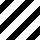
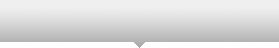
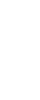
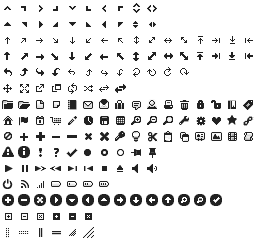
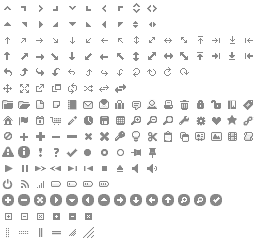
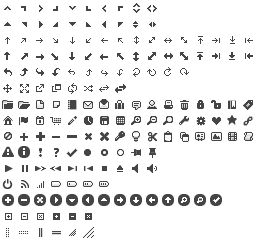
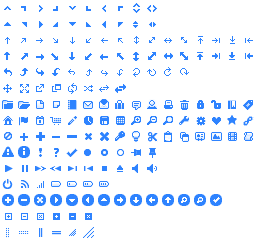
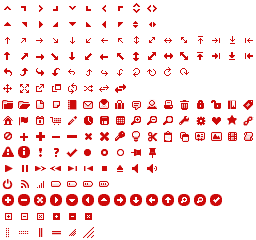
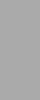
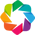
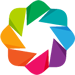
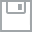
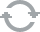
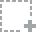
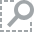
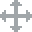
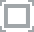
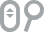

In [28]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

output_notebook()

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600)
p.line(x, y, color="#2222aa", line_width=3, source=source, name="foo")

show(p)

# This is where the tangle happens

## Changing a ``sin`` function

> Hover over the links and drag the values to modify the Bokeh plot.

The function has a frequency [``w``](#:w), amplitude of [``A``](#:A), and phase of [``phi``](#:phi).

In [29]:
# Create interactive Ipython notebook widgets

from IPython.html import widgets
from IPython import display
from ipytangle import tangle

@widgets.interact( 
          f=['sin','cos','tan'],
          w=(0, 100), 
          A=(1,10), 
          phi=(0, 10, 0.1)
         )
def funk( f,w, A, phi):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)    
    source.push_notebook()    
    return display.Javascript('console.log("do")')


In [31]:
# Couple the widgets with tangle.  Still need to figure out the bidirectional stuff
tangleInteract = tangle(
    w = funk.widget.children[1],
    A = funk.widget.children[2],
    phi = funk.widget.children[3],
)
tangleInteract


In [32]:
%install_ext https://gist.githubusercontent.com/tonyfast/eeed58903980e863559c/raw/disqus.py
%load_ext disqus
%disqus tonyfast 

Installed disqus.py. To use it, type:
  %load_ext disqus
The disqus extension is already loaded. To reload it, use:
  %reload_ext disqus
